In [75]:
from sympy import init_printing, IndexedBase, Symbol
from DLRSM1.symbolic_tools import momentum
init_printing()

In [76]:
from DLRSM1.FeynmanRules_senjanovic_H10_Z1_GM import (
    interactionsWp_n_l, interactionsWm_n_l,
    interactionsSp_n_l, interactionsSm_n_l,
    interactionsH10_SS_dict_approx,
    interactionsH10_W1mSp_dict_approx,
    interactionsH10_W1pSm_dict_approx,
    interactionsH10_W2pSm_dict_approx,
    interactionsH10_W2mSp_dict_approx,
    interactionsH10_WW_dict_approx,
    interactionsH10_ll
)

In [3]:
interactionsH10_WpSm_dict_approx = {
    **interactionsH10_W1pSm_dict_approx,
    **interactionsH10_W2pSm_dict_approx
}

interactionsH10_WmSp_dict_approx = {
    **interactionsH10_W1mSp_dict_approx,
    **interactionsH10_W2mSp_dict_approx
}

In [4]:
from LFVXD.Hdecay_diagrams_v2 import (
    TriangleFSS,
    TriangleFSV,
    TriangleFVS,
    TriangleFVV,
    TriangleSFF,
    TriangleVFF,
    BubbleFS,
    BubbleFV,
    BubbleSF,
    BubbleVF
)

In [5]:
from LFVXD.vertexes_v2 import (
    VertexSSS,
    VertexSFF,
    VertexVFF,
    VertexSVV,
    VertexSVpSm,
    VertexSSpVm
)
from DLRSM1.potential_senjanovic_HiggsDoublets import (
    H10,
    GLp,
    GLm,
    GRp,
    GRm,
    HRp,
    HRm,
    HLp,
    HLm,
    mH10,
    rho1,
    mHR,
    mHL
)
from DLRSM1.Gauge_Higgs_senjanovic_HiggsDoublets import mW1, mW2, mZ1, mZ2, W1p, W1m, W2p, W2m, Z1, Z2

In [6]:

from DLRSM1.FeynmanRules_senjanovic_H10_Z1_GM import ml, i, j, a, b, nadj, n, l, ladj, gamma_mu
from DLRSM1.FeynmanRules_senjanovic_H10_Z1_GM import CHARGED_PARTICLES_M, CHARGED_PARTICLES_P
from DLRSM1.dirac import diracPL, diracPR
mn = IndexedBase('mn')

In [7]:
particle_charge = {
    ptc:1 if ptc in CHARGED_PARTICLES_P else -1 if ptc in CHARGED_PARTICLES_M else 0
    for ptc in CHARGED_PARTICLES_P + CHARGED_PARTICLES_M
}
particle_charge

In [8]:
particle_charge[H10] = 0
particle_charge[Z1] = 0
particle_charge[Z2] = 0

## FSS ($n_i G_L^+ G_L^-$)

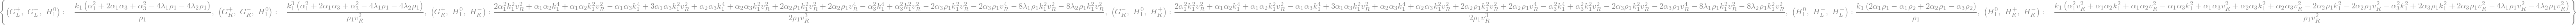

In [9]:
interactionsH10_SS_dict_approx

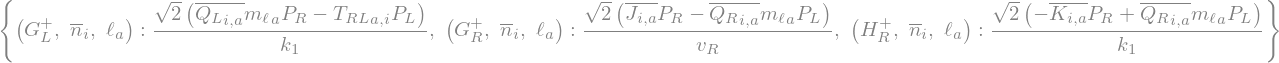

In [10]:
interactionsSp_n_l(i,a)

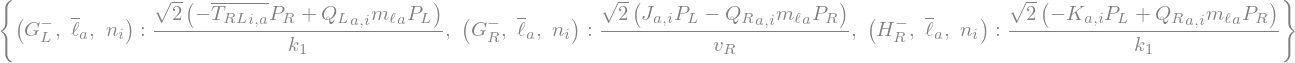

In [11]:
interactionsSm_n_l(i, a)

In [12]:
c_h10GLpm = interactionsH10_SS_dict_approx[(GLp, GLm, H10)].expand().collect(rho1, lambda x:x.factor())
v_h10GLpm = VertexSSS(c_h10GLpm)
cR_GLp_nadji_lb = interactionsSp_n_l(i, b)[(GLp, nadj[i], l[b])].expand().coeff(diracPR)
cL_GLp_nadji_lb = interactionsSp_n_l(i, b)[(GLp, nadj[i], l[b])].expand().coeff(diracPL)
v_GLp_nadji_lb = VertexSFF(cR_GLp_nadji_lb, cL_GLp_nadji_lb)
cR_GLm_ladja_ni = interactionsSm_n_l(i, a)[(GLm, ladj[a], n[i])].expand().coeff(diracPR)
cL_GLm_ladja_ni = interactionsSm_n_l(i, a)[(GLm, ladj[a], n[i])].expand().coeff(diracPL)
v_GLm_nadji_la = VertexSFF(cR_GLm_ladja_ni, cL_GLm_ladja_ni)

triangle_ni_GLp_GLm1 = TriangleFSS(
    v_h10GLpm,
    v_GLp_nadji_lb,
    v_GLm_nadji_la,
    [
        mH10, ml[a], ml[b] ,mn[i], mW1, mW1
    ]
)
triangle_ni_GLp_GLm1

TriangleFSS(VertexSSS(4*k_1*(\lambda_1 + \lambda_2) - k_1*(\alpha_1 + \alpha_3)**2/\rho_1), VertexSFF(cR=sqrt(2)*conjugate(Q_L[i, b])*m_\ell[b]/k_1, cL=-sqrt(2)*T_{RL}[b, i]/k_1), VertexSFF(cR=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1, cL=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1), [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}])

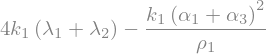

In [13]:
c_h10GLpm

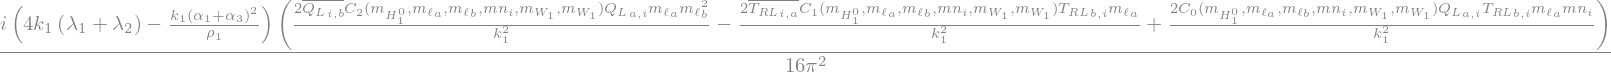

In [14]:
triangle_ni_GLp_GLm1.AL()

In [15]:
# Helper to get chiral couplings (reduces repetition)
from sympy import Expr
def get_chiral_couplings(interaction_term: Expr) -> tuple[Expr, Expr]:
    """Extracts Left (PL) and Right (PR) chiral couplings."""
    term_expanded = interaction_term.expand()
    cL = term_expanded.coeff(diracPL)
    cR = term_expanded.coeff(diracPR)
    return cL, cR

nu_index = i
lepton_index = b
antilep_index = a

# Define External Particles: (particle, Mass Symbol)
# Note: For fermions, use (particle, antiparticle, mass)
external_scalar = (H10, mH10)
external_antilepton = (l[antilep_index], ladj[antilep_index], ml[antilep_index])
external_lepton = (l[lepton_index], ladj[lepton_index], ml[lepton_index])

# Define Internal Particles for the FSS (n_i GLp GLm) loop: (particle, Mass Symbol)
internal_neutrino = (n[nu_index], nadj[nu_index], mn[nu_index])
internal_GL_plus = (GLp, mW1) # GLp Goldstone for W1+
internal_GL_minus = (GLm, mW1) # GLm Goldstonde for W1-

def find_interaction_coefficient(expected_particles: set,
                                interaction_dict: dict,
                                vertex_description: str) -> Expr:
    """
    Finds the coupling coefficient in an interaction dictionary that involves
    the specified set of particles.

    Args:
        expected_particles: A set of particle symbols expected at the vertex.
        interaction_dict: The dictionary of interactions { (particle_tuple): coefficient }.
        vertex_description: A string describing the vertex for error messages.

    Returns:
        The SymPy expression for the coupling coefficient.

    Raises:
        ValueError: If no matching interaction is found in the dictionary.
    """
    for interaction_particles, coefficient in interaction_dict.items():
        # Check if all expected particles are present in this interaction term
        # Note: Assumes interaction_particles is a tuple/list of symbols
        if all(p in interaction_particles for p in expected_particles):
            # Optional: Add a check if the sets are exactly equal if needed
            # if set(interaction_particles) == expected_particles:
            return coefficient
    # If loop completes without finding a match
    raise ValueError(f"Interaction for vertex '{vertex_description}' involving "
                    f"{expected_particles} not found in the provided dictionary.")


# --- Vertex Construction ---

# Vertex 1: H10 - GLp - GLm (SSS)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_GL_plus[0], internal_GL_minus[0]} # {H10, GLp, GLm}
interaction_dict_v1 = interactionsH10_SS_dict_approx
try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-GLp-GLm")
    v1 = VertexSSS(c1)
    print(f"Vertex 1 (H10-GLp-GLm) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: GLp - nadj_i - l_b (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_GL_plus[0], internal_neutrino[1], external_lepton[0]} # {GLp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices
try:
    # We need the specific interaction term, not just the particles it contains
    # The original logic implicitly assumed the dict keys match the needed vertex particles
    # Let's refine find_interaction_coefficient or handle it here.
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"GLp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (GLp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: GLm - ladj_a - n_i (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_GL_minus[0], external_antilepton[1], internal_neutrino[0]} # {GLm, ladj[a], n[i]} 
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices
try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"GLm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (GLm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")


# --- Diagram Instantiation ---

# Assemble the list of mass symbols in the correct order for TriangleFSS
# Order: [m_ext_scalar, m_ext_fermion1, m_ext_fermion2, m_int_fermion, m_int_scalar1, m_int_scalar2]
#mH10, ml[a], ml[b] ,mn[i], mW1, mW1 
mass_list = [
    external_scalar[1],        # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],    # ml[b]
    internal_neutrino[2],      # mn[i]
    internal_GL_plus[1],        # mW1 (for GLp)
    internal_GL_minus[1]        # mW1 (for GLm)
]
print("Mass List for TriangleFSS:", mass_list)
# Create the TriangleFSS diagram object
# Assumes v1 connects external scalar & internal scalars
# Assumes v2 connects internal scalar1, internal fermion, external fermion2 (outgoing l_b)
# Assumes v3 connects internal scalar2, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFSS documentation for exact vertex/particle ordering if unsure.
triangle_ni_GLp_GLm2 = TriangleFSS(
    v1, # Vertex connected to H10, GLp, GLm
    v2, # Vertex connected to GLp, n_i, lbar_b
    v3, # Vertex connected to GLm, l_a, nbar_i
    mass_list
)

Vertex 1 (H10-GLp-GLm) coupling found: -k_1*(\alpha_1**2 + 2*\alpha_1*\alpha_3 + \alpha_3**2 - 4*\lambda_1*\rho_1 - 4*\lambda_2*\rho_1)/\rho_1
Vertex 2 (GLp-n[i]-lbar[b]) coupling found:
L=-sqrt(2)*T_{RL}[b, i]/k_1,
R=sqrt(2)*conjugate(Q_L[i, b])*m_\ell[b]/k_1
Vertex 3 (GLm-l[a]-nbar[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}]


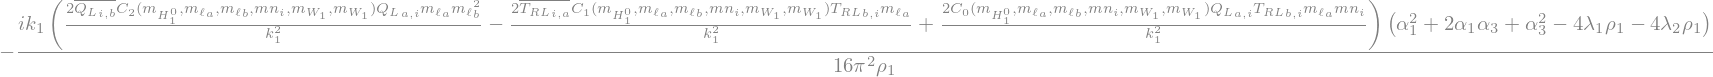

In [16]:
triangle_ni_GLp_GLm2.AL()

In [17]:
(triangle_ni_GLp_GLm2.AL() - triangle_ni_GLp_GLm1.AL()).expand()

## FSS ($n_i G_R^+ G_R^-$)

In [18]:
# Define Internal Particles for the FSS (n_i GRp GRm) loop: (particle, Mass Symbol)}
internal_GR_plus = (GRp, mW2) # GRp Goldstone for W2+
internal_GR_minus = (GRm, mW2) # GRm Goldstonde for W2-

# --- Vertex Construction ---

# Vertex 1: H10 - GRp - GRm (SSS)
# ---------------------------------

particles_v1 = {external_scalar[0], internal_GR_plus[0], internal_GR_minus[0]} # {H10, GRp, GRm}
interaction_dict_v1 = interactionsH10_SS_dict_approx
try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-GRp-GRm")
    v1 = VertexSSS(c1)
    print(f"Vertex 1 (H10-GRp-GRm) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: GRp - nadj_i - l_b (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_GR_plus[0], internal_neutrino[1], external_lepton[0]} # {GRp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"GRp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (GRp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: GRm - ladj_a - n_i (SFF)
# --------------------------------- 
# Note: The interaction function needs the specific indices
particles_v3 = {internal_GR_minus[0], external_antilepton[1], internal_neutrino[0]} # {GRm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"GRm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (GRm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---

# Assemble the list of mass symbols in the correct order for TriangleFSS
#mH10, ml[a], ml[b] ,mn[i], mW2, mW2

mass_list = [
    external_scalar[1],        # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],    # ml[b]
    internal_neutrino[2],      # mn[i]
    internal_GR_plus[1],        # mW2 (for GRp)
    internal_GR_minus[1]        # mW2 (for GRm)
] 
print("Mass List for TriangleFSS:", mass_list)
# Create the TriangleFSS diagram object
# Assumes v1 connects external scalar & internal scalars
# Assumes v2 connects internal scalar1, internal fermion, external fermion2 (outgoing l_b)
# Assumes v3 connects internal scalar2, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFSS documentation for exact vertex/particle ordering if unsure.
triangle_ni_GRp_GRm = TriangleFSS(
    v1, # Vertex connected to H10, GRp, GRm
    v2, # Vertex connected to GRp, n_i, lbar_b
    v3, # Vertex connected to GRm, l_a, nbar_i
    mass_list
)

Vertex 1 (H10-GRp-GRm) coupling found: -k_1**3*(\alpha_1**2 + 2*\alpha_1*\alpha_3 + \alpha_3**2 - 4*\lambda_1*\rho_1 - 4*\lambda_2*\rho_1)/(\rho_1*v_R**2)
Vertex 2 (GRp-n[i]-lbar[b]) coupling found:
L=-sqrt(2)*conjugate(Q_R[i, b])*m_\ell[b]/v_R,
R=sqrt(2)*conjugate(J[i, b])/v_R
Vertex 3 (GRm-l[a]-nbar[i]) coupling found: L=sqrt(2)*J[a, i]/v_R, R=-sqrt(2)*Q_R[a, i]*m_\ell[a]/v_R
Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_2}, m_{W_2}]


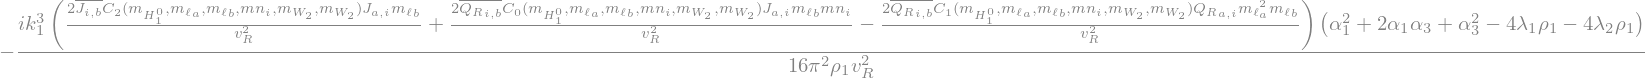

In [19]:
triangle_ni_GRp_GRm.AL()

## FSS ($n_i H_L^+ H_L^-$)

In [20]:
# Define Internal Particles for the FSS (n_i HLp HLm) loop: (particle, Mass Symbol)}
internal_HL_plus = (HLp, mHL) # H_L^+
internal_HL_minus = (HLm, mHL) # H_L^-

# This diagram does not contributs to Hdecay, because H_L^+ and H_L^- do not couble to leptons

## FSS ($n_i H_R^+ H_R^-$)

Vertex 1 (H10-HRp-HRm) coupling found: -k_1*(\alpha_1**2*v_R**2 + \alpha_1*\alpha_2*k_1**2 + \alpha_1*\alpha_2*v_R**2 - \alpha_1*\alpha_3*k_1**2 + \alpha_1*\alpha_3*v_R**2 + \alpha_2*\alpha_3*k_1**2 + \alpha_2*\alpha_3*v_R**2 - 2*\alpha_2*\rho_1*k_1**2 - 2*\alpha_2*\rho_1*v_R**2 - \alpha_3**2*k_1**2 + 2*\alpha_3*\rho_1*k_1**2 + 2*\alpha_3*\rho_1*v_R**2 - 4*\lambda_1*\rho_1*v_R**2 - 4*\lambda_2*\rho_1*v_R**2)/(\rho_1*v_R**2)
Vertex 2 (HRp-n[i]-lbar[b]) coupling found:
L=sqrt(2)*conjugate(Q_R[i, b])*m_\ell[b]/k_1,
R=-sqrt(2)*conjugate(K[i, b])/k_1
Vertex 3 (HRm-l[a]-nbar[i]) coupling found: L=-sqrt(2)*K[a, i]/k_1, R=sqrt(2)*Q_R[a, i]*m_\ell[a]/k_1
Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{H_L^+}, m_{H_L^+}]


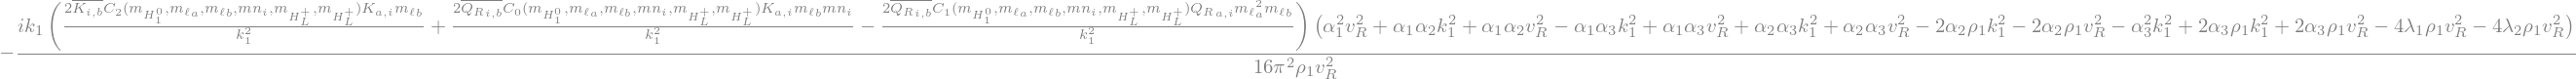

In [ ]:
# Define Internal Particles for the FSS (n_i HRp HRm) loop: (particle, Mass Symbol)}
internal_HR_plus = (HRp, mHR) # H_R^+
internal_HR_minus = (HRm, mHR) # H_R^-

# --- Vertex Construction ---
# Vertex 1: H10 - HRp - HRm (SSS)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_HR_plus[0], internal_HR_minus[0]} # {H10, HRp, HRm}
interaction_dict_v1 = interactionsH10_SS_dict_approx

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-HRp-HRm")
    v1 = VertexSSS(c1)
    print(f"Vertex 1 (H10-HRp-HRm) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: HRp - nadj_i - l_b (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_HR_plus[0], internal_neutrino[1], external_lepton[0]} # {HRp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"HRp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (HRp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e: 
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: HRm - ladj_a - n_i (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_HR_minus[0], external_antilepton[1], internal_neutrino[0]} # {HRm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"HRm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (HRm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFSS
# mH10, ml[a], ml[b] ,mn[i], mHR, mHR
mass_list = [
    external_scalar[1],        # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],    # ml[b]
    internal_neutrino[2],      # mn[i]
    internal_HR_plus[1],        # mHR (for HRp)
    internal_HR_minus[1]        # mHR (for HRm)
]

print("Mass List for TriangleFSS:", mass_list)
# Create the TriangleFSS diagram object
# Assumes v1 connects external scalar & internal scalars
# Assumes v2 connects internal scalar1, internal fermion, external fermion2 (
# outgoing l_b)
# Assumes v3 connects internal scalar2, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFSS documentation for exact vertex/particle ordering if unsure.
triangle_ni_HRp_HRm = TriangleFSS(
    v1, # Vertex connected to H10, HRp, HRm
    v2, # Vertex connected to HRp, n_i, lbar_b
    v3, # Vertex connected to HRm, l_a, nbar_i
    mass_list
)
triangle_ni_HRp_HRm.AL()


## FSS ($n_i G_R^+ H_R^-$)

Vertex 1 (H10-GRp-HRm) coupling found: (2*\alpha_1**2*k_1**2*v_R**2 + \alpha_1*\alpha_2*k_1**4 + \alpha_1*\alpha_2*k_1**2*v_R**2 - \alpha_1*\alpha_3*k_1**4 + 3*\alpha_1*\alpha_3*k_1**2*v_R**2 + \alpha_2*\alpha_3*k_1**4 + \alpha_2*\alpha_3*k_1**2*v_R**2 + 2*\alpha_2*\rho_1*k_1**2*v_R**2 + 2*\alpha_2*\rho_1*v_R**4 - \alpha_3**2*k_1**4 + \alpha_3**2*k_1**2*v_R**2 - 2*\alpha_3*\rho_1*k_1**2*v_R**2 - 2*\alpha_3*\rho_1*v_R**4 - 8*\lambda_1*\rho_1*k_1**2*v_R**2 - 8*\lambda_2*\rho_1*k_1**2*v_R**2)/(2*\rho_1*v_R**3)
Vertex 2 (GRp-n[i]-lbar[b]) coupling found:
L=-sqrt(2)*conjugate(Q_R[i, b])*m_\ell[b]/v_R,
R=sqrt(2)*conjugate(J[i, b])/v_R
Vertex 3 (HRm-l[a]-nbar[i]) coupling found: L=-sqrt(2)*K[a, i]/k_1, R=sqrt(2)*Q_R[a, i]*m_\ell[a]/k_1
Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_2}, m_{H_L^+}]


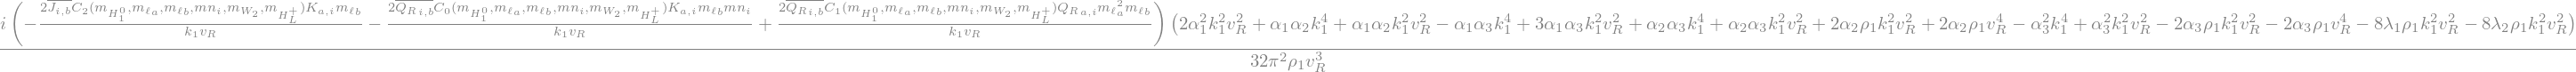

In [22]:
# FSS (n_i GRp HRm) loop: (particle, Mass Symbol)}

# --- Vertex Construction ---
# Vertex 1: H10 - GRp - HRm (SSS)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_GR_plus[0], internal_HR_minus[0]} # {H10, GRp, HRm}
interaction_dict_v1 = interactionsH10_SS_dict_approx

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-GRp-HRm")
    v1 = VertexSSS(c1)
    print(f"Vertex 1 (H10-GRp-HRm) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: GRp - nadj_i - l_b (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_GR_plus[0], internal_neutrino[1], external_lepton[0]} # {GRp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"GRp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (GRp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: HRm - ladj_a - n_i (SFF)
# --------------------------------- 
# Note: The interaction function needs the specific indices
particles_v3 = {internal_HR_minus[0], external_antilepton[1], internal_neutrino[0]} # {HRm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"HRm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (HRm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFSS
# mH10, ml[a], ml[b] ,mn[i], mW2, mHR
mass_list = [
    external_scalar[1],        # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],    # ml[b]
    internal_neutrino[2],      # mn[i]
    internal_GR_plus[1],        # mW2 (for GRp)
    internal_HR_minus[1]        # mHR (for HRm)
]
print("Mass List for TriangleFSS:", mass_list)
# Create the TriangleFSS diagram object
# Assumes v1 connects external scalar & internal scalars
# Assumes v2 connects internal scalar1, internal fermion, external fermion2 (
# outgoing l_b)
# Assumes v3 connects internal scalar2, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFSS documentation for exact vertex/particle ordering if unsure.
triangle_ni_GRp_HRm = TriangleFSS(
    v1, # Vertex connected to H10, GRp, HRm
    v2, # Vertex connected to GRp, n_i, lbar_b
    v3, # Vertex connected to HRm, l_a, nbar_i
    mass_list
)
triangle_ni_GRp_HRm.AL()


## FSS ($n_i H_R^+ G_R^-$)

Vertex 1 (H10-HRp-GRm) coupling found: (2*\alpha_1**2*k_1**2*v_R**2 + \alpha_1*\alpha_2*k_1**4 + \alpha_1*\alpha_2*k_1**2*v_R**2 - \alpha_1*\alpha_3*k_1**4 + 3*\alpha_1*\alpha_3*k_1**2*v_R**2 + \alpha_2*\alpha_3*k_1**4 + \alpha_2*\alpha_3*k_1**2*v_R**2 + 2*\alpha_2*\rho_1*k_1**2*v_R**2 + 2*\alpha_2*\rho_1*v_R**4 - \alpha_3**2*k_1**4 + \alpha_3**2*k_1**2*v_R**2 - 2*\alpha_3*\rho_1*k_1**2*v_R**2 - 2*\alpha_3*\rho_1*v_R**4 - 8*\lambda_1*\rho_1*k_1**2*v_R**2 - 8*\lambda_2*\rho_1*k_1**2*v_R**2)/(2*\rho_1*v_R**3)
Vertex 2 (HRp-n[i]-lbar[b]) coupling found:
L=sqrt(2)*conjugate(Q_R[i, b])*m_\ell[b]/k_1,
R=-sqrt(2)*conjugate(K[i, b])/k_1
Vertex 3 (GRm-l[a]-nbar[i]) coupling found: L=sqrt(2)*J[a, i]/v_R, R=-sqrt(2)*Q_R[a, i]*m_\ell[a]/v_R
Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{H_L^+}, m_{W_2}]


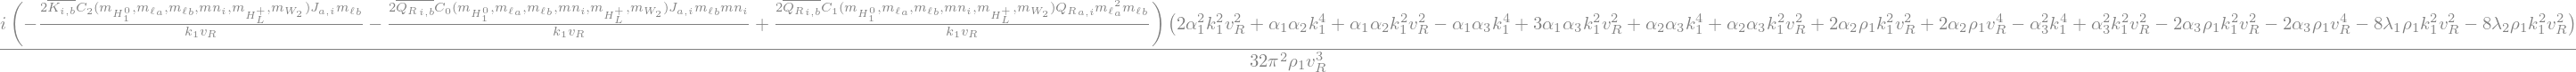

In [23]:
# FSS (n_i HRp GRm) loop: (particle, Mass Symbol)}

# --- Vertex Construction ---
# Vertex 1: H10 - HRp - GRm (SSS)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_HR_plus[0], internal_GR_minus[0]} # {H10, HRp, GRm}
interaction_dict_v1 = interactionsH10_SS_dict_approx

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-HRp-GRm")
    v1 = VertexSSS(c1)
    print(f"Vertex 1 (H10-HRp-GRm) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: HRp - nadj_i - l_b (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_HR_plus[0], internal_neutrino[1], external_lepton[0]} # {HRp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"HRp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (HRp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: GRm - ladj_a - n_i (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_GR_minus[0], external_antilepton[1], internal_neutrino[0]} # {GRm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"GRm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (GRm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFSS
# mH10, ml[a], ml[b] ,mn[i], mHR, mW2

mass_list = [
    external_scalar[1],        # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],    # ml[b]
    internal_neutrino[2],      # mn[i]
    internal_HR_plus[1],        # mHR (for HRp)
    internal_GR_minus[1]        # mW2 (for GRm)
]
print("Mass List for TriangleFSS:", mass_list)
# Create the TriangleFSS diagram object
# Assumes v1 connects external scalar & internal scalars
# Assumes v2 connects internal scalar1, internal fermion, external fermion2 (
# outgoing l_b)
# Assumes v3 connects internal scalar2, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFSS documentation for exact vertex/particle ordering if unsure.
triangle_ni_HRp_GRm = TriangleFSS(
    v1, # Vertex connected to H10, HRp, GRm
    v2, # Vertex connected to HRp, n_i, lbar_b
    v3, # Vertex connected to GRm, l_a, nbar_i
    mass_list
)
triangle_ni_HRp_GRm.AL()


# FVV ($n_i W_1^+ W_1^-$)

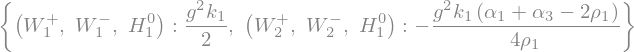

In [24]:
interactionsH10_WW_dict_approx

In [25]:
def get_chiral_couplings_gamma_mu(interaction_term: Expr) -> tuple[Expr, Expr]:
    """Extracts Left (PL) and Right (PR) chiral couplings."""
    term_expanded = interaction_term.expand()
    cL = term_expanded.coeff(gamma_mu*diracPL)
    cR = term_expanded.coeff(gamma_mu*diracPR)
    return cL, cR

Vertex 1 (H10-W1p-W1m) coupling found: g**2*k_1/2
Vertex 2 (W1p-n[i]-lbar[b]) coupling found:
L=g*conjugate(Q_L[i, b])/2,
R=0
Vertex 3 (W1m-l[a]-nbar[i]) coupling found: L=g*Q_L[a, i]/2, R=0
Mass List for TriangleFVV: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}]


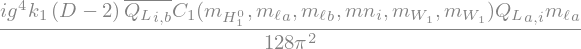

In [26]:
# FVV (n_i W1p W1m) loop: (particle, Mass Symbol)}

internal_W1_plus = (W1p, mW1) # W1^+
internal_W1_minus = (W1m, mW1) # W1^-

# --- Vertex Construction ---
# Vertex 1: H10 - W1p - W1m (SVV)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_W1_plus[0], internal_W1_minus[0]} # {H10, W1p, W1m}
interaction_dict_v1 = interactionsH10_WW_dict_approx

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-W1p-W1m")
    v1 = VertexSVV(c1)
    print(f"Vertex 1 (H10-W1p-W1m) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: W1p - nadj_i - l_b (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_W1_plus[0], internal_neutrino[1], external_lepton[0]} # {W1p, nadj[i], l[b]}
interaction_dict_v2 = interactionsWp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"W1p-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings_gamma_mu(c2)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v2 = VertexVFF(c2R, c2L)
    print(f"Vertex 2 (W1p-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: W1m - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_W1_minus[0], external_antilepton[1], internal_neutrino[0]} # {W1m, ladj[a], n[i]}
interaction_dict_v3 = interactionsWm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"W1m-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings_gamma_mu(c3)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v3 = VertexVFF(c3R, c3L)
    print(f"Vertex 3 (W1m-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFSS
# mH10, ml[a], ml[b] ,mn[i], mW1, mW1
mass_list = [
    external_scalar[1],         # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_W1_plus[1],        # mW1
    internal_W1_minus[1]        # mW1
]
print("Mass List for TriangleFVV:", mass_list)

# Create the TriangleFVV diagram object
# Assumes v1 connects external scalar & internal vector1 & internal vector2
# Assumes v2 connects internal vector1, internal fermion, external fermion2 (
# outgoing l_b)
# Assumes v3 connects internal vector2, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFVV documentation for exact vertex/particle ordering if unsure.
triangle_ni_W1p_W1m = TriangleFVV(
    v1, # Vertex connected to H10, W1p, W1m
    v2, # Vertex connected to W1p, n_i, lbar_b
    v3, # Vertex connected to W1m, l_a, nbar_i
    mass_list
)
triangle_ni_W1p_W1m.AL()

# FVV ($n_i W_2^+ W_2^-$)

Vertex 1 (H10-W2p-W2m) coupling found: -g**2*k_1*(\alpha_1 + \alpha_3 - 2*\rho_1)/(4*\rho_1)
Vertex 2 (W2p-n[i]-lbar[b]) coupling found:
L=0,
R=g*conjugate(Q_R[i, b])/2
Vertex 3 (W2m-l[a]-nbar[i]) coupling found: L=0, R=g*Q_R[a, i]/2
Mass List for TriangleFVV: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_2}, m_{W_2}]


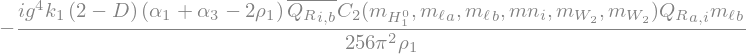

In [27]:
# FVV (n_i W2p W2m) loop: (particle, Mass Symbol)}

internal_W2_plus = (W2p, mW2) # W2^+
internal_W2_minus = (W2m, mW2) # W2^-

# --- Vertex Construction ---
# Vertex 1: H10 - W2p - W2m (SVV)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_W2_plus[0], internal_W2_minus[0]} # {H10, W2p, W2m}
interaction_dict_v1 = interactionsH10_WW_dict_approx

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-W2p-W2m")
    v1 = VertexSVV(c1)
    print(f"Vertex 1 (H10-W2p-W2m) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: W2p - nadj_i - l_b (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices

particles_v2 = {internal_W2_plus[0], internal_neutrino[1], external_lepton[0]} # {W2p, nadj[i], l[b]}
interaction_dict_v2 = interactionsWp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"W2p-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings_gamma_mu(c2)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v2 = VertexVFF(c2R, c2L)
    print(f"Vertex 2 (W2p-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: W2m - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices

particles_v3 = {internal_W2_minus[0], external_antilepton[1], internal_neutrino[0]} # {W2m, ladj[a], n[i]}
interaction_dict_v3 = interactionsWm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"W2m-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings_gamma_mu(c3)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v3 = VertexVFF(c3R, c3L)
    print(f"Vertex 3 (W2m-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFSS
# mH10, ml[a], ml[b] ,mn[i], mW2, mW2
mass_list = [
    external_scalar[1],         # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_W2_plus[1],        # mW2
    internal_W2_minus[1]        # mW2
]
print("Mass List for TriangleFVV:", mass_list)

# Create the TriangleFVV diagram object
# Assumes v1 connects external scalar & internal vector1 & internal vector2
# Assumes v2 connects internal vector1, internal fermion, external fermion2 (
# outgoing l_b)
# Assumes v3 connects internal vector2, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFVV documentation for exact vertex/particle ordering if unsure.
triangle_ni_W2p_W2m = TriangleFVV(
    v1, # Vertex connected to H10, W2p, W2m
    v2, # Vertex connected to W2p, n_i, lbar_b
    v3, # Vertex connected to W2m, l_a, nbar_i
    mass_list
)
triangle_ni_W2p_W2m.AL()

# FSV ($n_i W_1^+ G_L^-$)

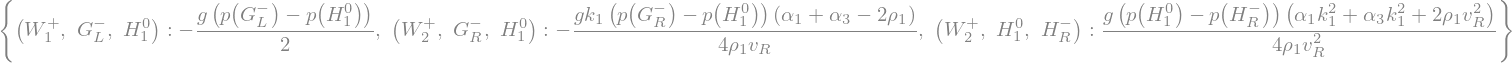

In [28]:
interactionsH10_WpSm_dict_approx

In [29]:
internal_GL_minus

In [30]:
def get_momentum_couplings(interaction_term: Expr, H1: Symbol, H2: Symbol) -> Expr:
    """Extracts momentum couplings for the given particles."""
    # Assuming H1 and H2 are the two particles in the interaction term
    term_expanded = interaction_term.expand()
    
    if particle_charge[H1] == 1:
        cch = term_expanded.coeff(momentum(H1))
        c0 = term_expanded.coeff(momentum(H2))
        if  cch == -c0:
            return cch    
    elif particle_charge[H2] == 1:
        cch = term_expanded.coeff(momentum(H2))
        c0 = term_expanded.coeff(momentum(H1))
        if  cch == -c0:
            return cch
    elif particle_charge[H1] == -1:
        cch = term_expanded.coeff(momentum(H1))
        c0 = term_expanded.coeff(momentum(H2))
        if  cch == -c0:
            return c0
    elif particle_charge[H2] == -1:
        cch = term_expanded.coeff(momentum(H2))
        c0 = term_expanded.coeff(momentum(H1))
        if  cch == -c0:
            return c0
    else:
        raise ValueError("Invalid charge for particles")
    return 0

Vertex 1 (H10-W1p-GLm) coupling found: g/2
Vertex 2 (W1p-n[i]-lbar[b]) coupling found:
L=g*conjugate(Q_L[i, b])/2,
R=0
Vertex 3 (GLm-l[a]-nbar[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
Mass List for TriangleFSV: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_2}, m_{W_1}]


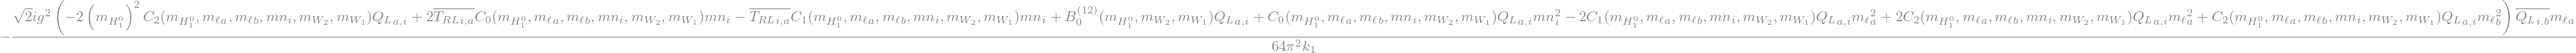

In [31]:
# FSV (n_i W1p GLm) loop: (particle, Mass Symbol)}

# --- Vertex Construction ---
# Vertex 1: H10 - W1p - GLm (SVS)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_W1_plus[0], internal_GL_minus[0]} # {H10, W1p, GLm}
interaction_dict_v1 = interactionsH10_WpSm_dict_approx

try:
    coeff1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-W2p-GLm")
    c1 = get_momentum_couplings(coeff1, external_scalar[0], internal_GL_minus[0])
    v1 = VertexSVpSm(c1)
    print(f"Vertex 1 (H10-W1p-GLm) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: W1p - nadj_i - l_b (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_W1_plus[0], internal_neutrino[1], external_lepton[0]} # {W1p, nadj[i], l[b]}
interaction_dict_v2 = interactionsWp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"W1p-n[{nu_index}]-lbar[{lepton_index}]")
    
    c2L, c2R = get_chiral_couplings_gamma_mu(c2)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v2 = VertexVFF(c2R, c2L)
    print(f"Vertex 2 (W1p-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: GLm - ladj_a - n_i (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_GL_minus[0], external_antilepton[1], internal_neutrino[0]} # {GLm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices    

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"GLm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (GLm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFSV
# mH10, ml[a], ml[b] ,mn[i], mW1, mW1
mass_list = [
    external_scalar[1],         # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_W2_plus[1],        # mW1
    internal_GL_minus[1]        # mW1 (for GLm)
]
print("Mass List for TriangleFSV:", mass_list)
# Create the TriangleFSV diagram object
# Assumes v1 connects external scalar & internal vector & internal scalar
# Assumes v2 connects internal vector, internal fermion, external fermion2 (
# outgoing l_b)
# Assumes v3 connects internal scalar, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFVS documentation for exact vertex/particle ordering if unsure.

triangle_ni_W1p_GLm = TriangleFSV(
    v1, # Vertex connected to H10, W1p, GLm
    v2, # Vertex connected to W1p, n_i, lbar_b
    v3, # Vertex connected to GLm, l_a, nbar_i
    mass_list
)
triangle_ni_W1p_GLm.AL().factor()

# FSV ($n_i W_2^+ G_R^-$)

Vertex 1 (H10-W2p-GRm) coupling found: \alpha_1*g*k_1/(4*\rho_1*v_R) + \alpha_3*g*k_1/(4*\rho_1*v_R) - g*k_1/(2*v_R)
Vertex 2 (W2p-n[i]-lbar[b]) coupling found:
L=0,
R=g*conjugate(Q_R[i, b])/2
Vertex 3 (GRm-l[a]-nbar[i]) coupling found: L=sqrt(2)*J[a, i]/v_R, R=-sqrt(2)*Q_R[a, i]*m_\ell[a]/v_R
Mass List for TriangleFSV: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_2}, m_{W_2}]


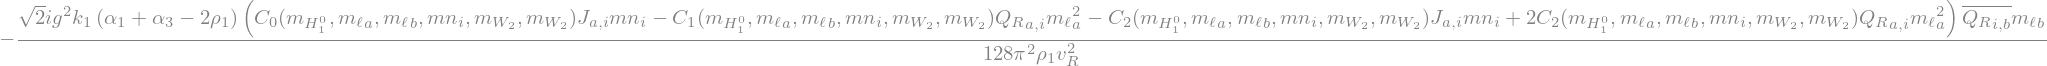

In [32]:
# FSV (n_i W2p GRm) loop: (particle, Mass Symbol)}

# --- Vertex Construction ---
# Vertex 1: H10 - W2p - GRm (SVS)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_W2_plus[0], internal_GR_minus[0]} # {H10, W2p, GRm}
interaction_dict_v1 = interactionsH10_WpSm_dict_approx

try:
    coeff1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-W2p-GRm")
    c1 = get_momentum_couplings(coeff1, external_scalar[0], internal_GR_minus[0])
    v1 = VertexSVpSm(c1)
    print(f"Vertex 1 (H10-W2p-GRm) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: W2p - nadj_i - l_b (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices

particles_v2 = {internal_W2_plus[0], internal_neutrino[1], external_lepton[0]} # {W2p, nadj[i], l[b]}
interaction_dict_v2 = interactionsWp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"W2p-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings_gamma_mu(c2)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v2 = VertexVFF(c2R, c2L)
    print(f"Vertex 2 (W2p-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: GRm - ladj_a - n_i (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_GR_minus[0], external_antilepton[1], internal_neutrino[0]} # {GRm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"GRm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (GRm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFSV
# mH10, ml[a], ml[b] ,mn[i], mW2, mW2
mass_list = [
    external_scalar[1],         # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_W2_plus[1],        # mW2
    internal_GR_minus[1]        # mW2 (for GRm)
]
print("Mass List for TriangleFSV:", mass_list)

# Create the TriangleFSV diagram object
# Assumes v1 connects external scalar & internal vector & internal scalar
# Assumes v2 connects internal vector, internal fermion, external fermion2 (
# outgoing l_b)
# Assumes v3 connects internal scalar, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFSV documentation for exact vertex/particle ordering if unsure.
triangle_ni_W2p_GRm = TriangleFSV(
    v1, # Vertex connected to H10, W2p, GRm
    v2, # Vertex connected to W2p, n_i, lbar_b
    v3, # Vertex connected to GRm, l_a, nbar_i
    mass_list
)
triangle_ni_W2p_GRm.AL().factor()


# FSV ($n_i W_2^+ H_R^-$)

Vertex 1 (H10-W2p-HRm) coupling found: \alpha_1*g*k_1**2/(4*\rho_1*v_R**2) + \alpha_3*g*k_1**2/(4*\rho_1*v_R**2) + g/2
Vertex 2 (W2p-n[i]-lbar[b]) coupling found:
L=0,
R=g*conjugate(Q_R[i, b])/2
Vertex 3 (HRm-l[a]-nbar[i]) coupling found: L=-sqrt(2)*K[a, i]/k_1, R=sqrt(2)*Q_R[a, i]*m_\ell[a]/k_1
Mass List for TriangleFSV: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_2}, m_{H_L^+}]


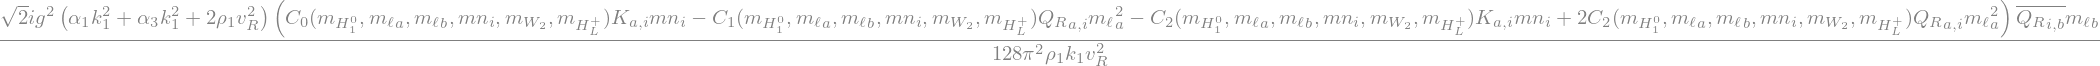

In [33]:
# FSV (n_i W2p HRm) loop: (particle, Mass Symbol)}

# --- Vertex Construction ---
# Vertex 1: H10 - W2p - HRm (SVS)
# ---------------------------------

particles_v1 = {external_scalar[0], internal_W2_plus[0], internal_HR_minus[0]} # {H10, W2p, HRm}
interaction_dict_v1 = interactionsH10_WpSm_dict_approx

try:
    coeff1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-W2p-HRm")
    c1 = get_momentum_couplings(coeff1, external_scalar[0], internal_HR_minus[0])
    v1 = VertexSVpSm(c1)
    print(f"Vertex 1 (H10-W2p-HRm) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: W2p - nadj_i - l_b (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_W2_plus[0], internal_neutrino[1], external_lepton[0]} # {W2p, nadj[i], l[b]}
interaction_dict_v2 = interactionsWp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"W2p-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings_gamma_mu(c2)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v2 = VertexVFF(c2R, c2L)
    print(f"Vertex 2 (W2p-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: HRm - ladj_a - n_i (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_HR_minus[0], external_antilepton[1], internal_neutrino[0]} # {HRm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"HRm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (HRm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFSV
# mH10, ml[a], ml[b] ,mn[i], mW2, mW2
mass_list = [
    external_scalar[1],         # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_W2_plus[1],        # mW2
    internal_HR_minus[1]        # mW2 (for HRm)
]
print("Mass List for TriangleFSV:", mass_list)
# Create the TriangleFSV diagram object
# Assumes v1 connects external scalar & internal vector & internal scalar
# Assumes v2 connects internal vector, internal fermion, external fermion2 (
# outgoing l_b)
# Assumes v3 connects internal scalar, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFSV documentation for exact vertex/particle ordering if unsure.
triangle_ni_W2p_HRm = TriangleFSV(
    v1, # Vertex connected to H10, W2p, HRm
    v2, # Vertex connected to W2p, n_i, lbar_b
    v3, # Vertex connected to HRm, l_a, nbar_i
    mass_list
)
triangle_ni_W2p_HRm.AL().factor()

# FVS ($n_i G_L^+ W_1^-$)

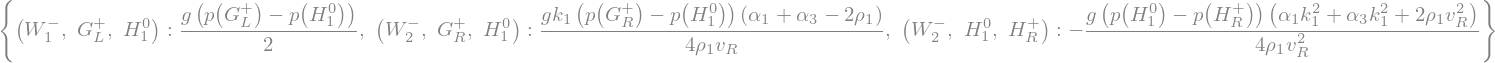

In [34]:
interactionsH10_WmSp_dict_approx

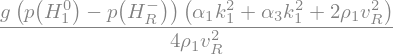

In [35]:
coeff1

Vertex 1 (H10-GLp-W1m) coupling found: g/2
Vertex 2 (GLp-n[i]-lbar[b]) coupling found:
L=-sqrt(2)*T_{RL}[b, i]/k_1,
R=sqrt(2)*conjugate(Q_L[i, b])*m_\ell[b]/k_1
Vertex 3 (W1m-l[a]-nbar[i]) coupling found: L=g*Q_L[a, i]/2, R=0
Mass List for TriangleFVS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}]


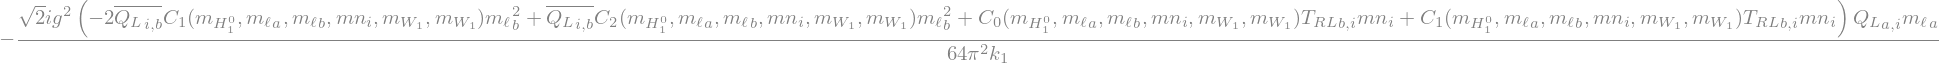

In [36]:
# FVS (n_i GLp W1m) loop: (particle, Mass Symbol)}

# --- Vertex Construction ---
# Vertex 1: H10 - GLp - W1m (SSV)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_GL_plus[0], internal_W1_minus[0]} # {H10, GLp, W1m}
interaction_dict_v1 = interactionsH10_WmSp_dict_approx

try:
    coeff1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-GLp-W1m")
    c1 = get_momentum_couplings(coeff1, external_scalar[0], internal_GL_plus[0])
    v1 = VertexSSpVm(c1)
    print(f"Vertex 1 (H10-GLp-W1m) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: GLp - nadj_i - l_b (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices

particles_v2 = {internal_GL_plus[0], internal_neutrino[1], external_lepton[0]} # {GLp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"GLp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (GLp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: W1m - ladj_a - n_i (SVF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_W1_minus[0], external_antilepton[1], internal_neutrino[0]} # {W1m, ladj[a], n[i]}
interaction_dict_v3 = interactionsWm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"W1m-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings_gamma_mu(c3)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v3 = VertexVFF(c3R, c3L)
    print(f"Vertex 3 (W1m-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFVS
# mH10, ml[a], ml[b] ,mn[i], mW1, mW1
mass_list = [
    external_scalar[1],         # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_GL_plus[1],        # mW1 (for GLp)
    internal_W1_minus[1]        # mW1
]
print("Mass List for TriangleFVS:", mass_list)
# Create the TriangleFVS diagram object
# Assumes v1 connects external scalar & internal scalar & internal vector
# Assumes v2 connects internal scalar, internal fermion, external fermion2 (
# outgoing l_b)
# Assumes v3 connects internal vector, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFVS documentation for exact vertex/particle ordering if unsure.
triangle_ni_GLp_W1m = TriangleFVS(
    v1, # Vertex connected to H10, GLp, W1m
    v2, # Vertex connected to GLp, n_i, lbar_b
    v3, # Vertex connected to W1m, l_a, nbar_i
    mass_list
)
triangle_ni_GLp_W1m.AL().factor()


# FVS ($n_i G_R^+ W_2^-$)

Vertex 1 (H10-GRp-W2m) coupling found: \alpha_1*g*k_1/(4*\rho_1*v_R) + \alpha_3*g*k_1/(4*\rho_1*v_R) - g*k_1/(2*v_R)
Vertex 2 (GRp-n[i]-lbar[b]) coupling found:
L=-sqrt(2)*conjugate(Q_R[i, b])*m_\ell[b]/v_R,
R=sqrt(2)*conjugate(J[i, b])/v_R
Vertex 3 (W2m-l[a]-nbar[i]) coupling found: L=0, R=g*Q_R[a, i]/2
Mass List for TriangleFVS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_2}, m_{W_2}]


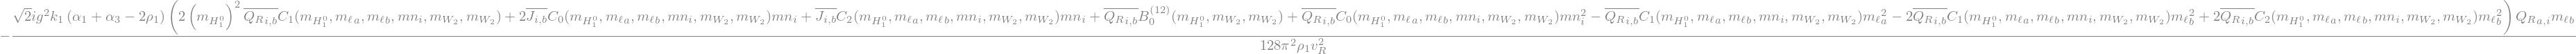

In [37]:
# FVS (n_i GRp W2m) loop: (particle, Mass Symbol)}

# --- Vertex Construction ---
# Vertex 1: H10 - GRp - W2m (SSV)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_GR_plus[0], internal_W2_minus[0]} # {H10, GRp, W2m}
interaction_dict_v1 = interactionsH10_WmSp_dict_approx

try:
    coeff1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-GRp-W2m")
    c1 = get_momentum_couplings(coeff1, external_scalar[0], internal_GR_plus[0])
    v1 = VertexSSpVm(c1)
    print(f"Vertex 1 (H10-GRp-W2m) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: GRp - nadj_i - l_b (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_GR_plus[0], internal_neutrino[1], external_lepton[0]} # {GRp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"GRp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (GRp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: W2m - ladj_a - n_i (SVF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_W2_minus[0], external_antilepton[1], internal_neutrino[0]} # {W2m, ladj[a], n[i]}
interaction_dict_v3 = interactionsWm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"W2m-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings_gamma_mu(c3)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v3 = VertexVFF(c3R, c3L)
    print(f"Vertex 3 (W2m-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFVS
# mH10, ml[a], ml[b] ,mn[i], mW2, mW2
mass_list = [
    external_scalar[1],         # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_GR_plus[1],        # mW2 (for GRp)
    internal_W2_minus[1]        # mW2
]
print("Mass List for TriangleFVS:", mass_list)
# Create the TriangleFVS diagram object
# Assumes v1 connects external scalar & internal scalar & internal vector
# Assumes v2 connects internal scalar, internal fermion, external fermion2 ( outgoing l_b)
# Assumes v3 connects internal vector, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFVS documentation for exact vertex/particle ordering if unsure.
triangle_ni_GRp_W2m = TriangleFVS(
    v1, # Vertex connected to H10, GRp, W2m
    v2, # Vertex connected to GRp, n_i, lbar_b
    v3, # Vertex connected to W2m, l_a, nbar_i
    mass_list
)
triangle_ni_GRp_W2m.AL().factor()


# FVS ($n_i H_R^+ W_2^-$)

Vertex 1 (H10-HRp-W2m) coupling found: \alpha_1*g*k_1**2/(4*\rho_1*v_R**2) + \alpha_3*g*k_1**2/(4*\rho_1*v_R**2) + g/2
Vertex 2 (HRp-n[i]-lbar[b]) coupling found:
L=sqrt(2)*conjugate(Q_R[i, b])*m_\ell[b]/k_1,
R=-sqrt(2)*conjugate(K[i, b])/k_1
Vertex 3 (W2m-l[a]-nbar[i]) coupling found: L=0, R=g*Q_R[a, i]/2
Mass List for TriangleFVS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{H_L^+}, m_{W_2}]


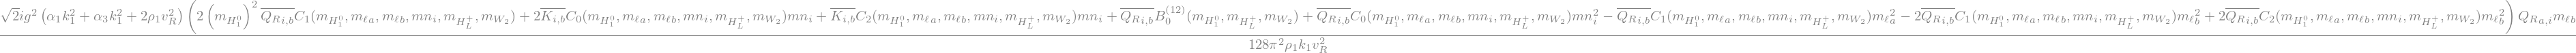

In [38]:
# FVS (n_i HRp W2m) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - HRp - W2m (SSV)
# ---------------------------------
particles_v1 = {external_scalar[0], internal_HR_plus[0], internal_W2_minus[0]} # {H10, HRp, W2m}
interaction_dict_v1 = interactionsH10_WmSp_dict_approx

try:
    coeff1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-HRp-W2m")
    c1 = get_momentum_couplings(coeff1, external_scalar[0], internal_HR_plus[0])
    v1 = VertexSSpVm(c1)
    print(f"Vertex 1 (H10-HRp-W2m) coupling found: {c1}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: HRp - nadj_i - l_b (SFF)
# ---------------------------------
# Note: The interaction function needs the specific indices

particles_v2 = {internal_HR_plus[0], internal_neutrino[1], external_lepton[0]} # {HRp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"HRp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (HRp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: W2m - ladj_a - n_i (SVF)
# ---------------------------------
# Note: The interaction function needs the specific indices

particles_v3 = {internal_W2_minus[0], external_antilepton[1], internal_neutrino[0]} # {W2m, ladj[a], n[i]}
interaction_dict_v3 = interactionsWm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"W2m-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings_gamma_mu(c3)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v3 = VertexVFF(c3R, c3L)
    print(f"Vertex 3 (W2m-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for TriangleFVS
# mH10, ml[a], ml[b] ,mn[i], mW2, mW2
mass_list = [
    external_scalar[1],         # mH10
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_HR_plus[1],        # mW2 (for HRp)
    internal_W2_minus[1]        # mW2
]
print("Mass List for TriangleFVS:", mass_list)
# Create the TriangleFVS diagram object
# Assumes v1 connects external scalar & internal scalar & internal vector
# Assumes v2 connects internal scalar, internal fermion, external fermion2 ( outgoing l_b)
# Assumes v3 connects internal vector, external fermion1 (outgoing ladj_a), internal fermion (n_i)
# Check LFVXD.Hdecay_diagrams_v2.TriangleFVS documentation for exact vertex/particle ordering if unsure.
triangle_ni_HRp_W2m = TriangleFVS(
    v1, # Vertex connected to H10, HRp, W2m
    v2, # Vertex connected to HRp, n_i, lbar_b
    v3, # Vertex connected to W2m, l_a, nbar_i
    mass_list
)
triangle_ni_HRp_W2m.AL().factor()

# FV ($n_i W_1$)

Vertex 1 (H10-lb-ladj[b]) coupling found: sqrt(2)*m_\ell[b]*PL/k_1 + sqrt(2)*m_\ell[b]*PR/k_1
Vertex 1 (H10-lb-ladj[b]) coupling found:
L=sqrt(2)*m_\ell[b]/k_1,
R=sqrt(2)*m_\ell[b]/k_1
Vertex 2 (W1p-n[i]-lbar[b]) coupling found:
L=g*conjugate(Q_L[i, b])/2,
R=0
Vertex 3 (W1m-l[a]-nbar[i]) coupling found: L=g*Q_L[a, i]/2, R=0
Mass List for BubbleFV: [m_\ell[a], m_\ell[b], mn[i], m_{W_1}]


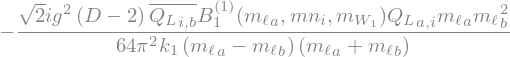

In [51]:
# FV (n_i W1) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - l_b - ladj_b (SFF)
# ---------------------------------

particles_v1 = {external_scalar[0], external_lepton[0], external_lepton[1]} # {H10, l[b], ladj[b]}
interaction_dict_v1 = interactionsH10_ll(lepton_index)

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-lb-ladj[b]")
    print(f"Vertex 1 (H10-lb-ladj[b]) coupling found: {c1}")
    c1L, c1R = get_chiral_couplings(c1)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v1 = VertexSFF(c1R, c1L)
    print(f"Vertex 1 (H10-lb-ladj[b]) coupling found:\nL={c1L},\nR={c1R}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: W1p -nadj_i - l_b (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_W1_plus[0], internal_neutrino[1], external_lepton[0]} # {W1p, nadj[i], l[b]}
interaction_dict_v2 = interactionsWp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"W1p-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings_gamma_mu(c2)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v2 = VertexVFF(c2R, c2L)
    print(f"Vertex 2 (W1p-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: W1m - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_W1_minus[0], external_antilepton[1], internal_neutrino[0]} # {W1m, ladj[a], n[i]}
interaction_dict_v3 = interactionsWm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"W1m-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings_gamma_mu(c3)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v3 = VertexVFF(c3R, c3L)
    print(f"Vertex 3 (W1m-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for BubbleFV
# ml[a], ml[b] ,mn[i], mW1

mass_list = [
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_W1_plus[1],        # mW1
]

print("Mass List for BubbleFV:", mass_list)
# Create the BubbleFV diagram object
# Assumes v1 connects external scalar & l[b] & ladj[b]
# Assumes v2 connects W1p, n_i, lbar_b
# Assumes v3 connects W1m, l_a, nbar_i
# Check LFVXD.Hdecay_diagrams_v2.BubbleFV documentation for exact vertex/particle ordering if unsure.
bubble_ni_W1 = BubbleFV(
    v1, # Vertex connected to H10, l[b], ladj[b]
    v2, # Vertex connected to W1p, n_i, lbar_b
    v3, # Vertex connected to W1m, l_a, nbar_i
    mass_list
)
bubble_ni_W1.AL().factor()



# FV ($n_i W_2$)

Vertex 1 (H10-lb-ladj[b]) coupling found: sqrt(2)*m_\ell[b]*PL/k_1 + sqrt(2)*m_\ell[b]*PR/k_1
Vertex 1 (H10-lb-ladj[b]) coupling found:
L=sqrt(2)*m_\ell[b]/k_1,
R=sqrt(2)*m_\ell[b]/k_1
Vertex 2 (W2p-n[i]-lbar[b]) coupling found:
L=0,
R=g*conjugate(Q_R[i, b])/2
Vertex 3 (W2m-l[a]-nbar[i]) coupling found: L=0, R=g*Q_R[a, i]/2
Mass List for BubbleFV: [m_\ell[a], m_\ell[b], mn[i], m_{W_2}]


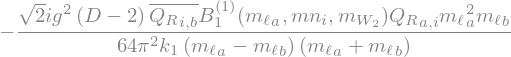

In [52]:
# FV (n_i W2) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - l_b - ladj_b (SFF)
# ---------------------------------
particles_v1 = {external_scalar[0], external_lepton[0], external_lepton[1]} # {H10, l[b], ladj[b]}
interaction_dict_v1 = interactionsH10_ll(lepton_index)

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-lb-ladj[b]")
    print(f"Vertex 1 (H10-lb-ladj[b]) coupling found: {c1}")
    c1L, c1R = get_chiral_couplings(c1)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v1 = VertexSFF(c1R, c1L)
    print(f"Vertex 1 (H10-lb-ladj[b]) coupling found:\nL={c1L},\nR={c1R}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: W2p - nadj_i - l_b (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_W2_plus[0], internal_neutrino[1], external_lepton[0]} # {W2p, nadj[i], l[b]}
interaction_dict_v2 = interactionsWp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"W2p-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings_gamma_mu(c2)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v2 = VertexVFF(c2R, c2L)
    print(f"Vertex 2 (W2p-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: W2m - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_W2_minus[0], external_antilepton[1], internal_neutrino[0]} # {W2m, ladj[a], n[i]}
interaction_dict_v3 = interactionsWm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"W2m-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings_gamma_mu(c3)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v3 = VertexVFF(c3R, c3L)
    print(f"Vertex 3 (W2m-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for BubbleFV
# ml[a], ml[b] ,mn[i], mW2
mass_list = [
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_W2_plus[1],        # mW2
]
print("Mass List for BubbleFV:", mass_list)
# Create the BubbleFV diagram object
# Assumes v1 connects external scalar & l[b] & ladj[b]
# Assumes v2 connects W2p, n_i, lbar_b
# Assumes v3 connects W2m, l_a, nbar_i
# Check LFVXD.Hdecay_diagrams_v2.BubbleFV documentation for exact vertex/particle ordering if unsure.
bubble_ni_W2 = BubbleFV(
    v1, # Vertex connected to H10, l[b], ladj[b]
    v2, # Vertex connected to W2p, n_i, lbar_b
    v3, # Vertex connected to W2m, l_a, nbar_i
    mass_list
)
bubble_ni_W2.AL().factor()


# VF ($W_1 n_i$)

Vertex 1 (H10-la-ladj[a]) coupling found: sqrt(2)*m_\ell[a]*PL/k_1 + sqrt(2)*m_\ell[a]*PR/k_1
Vertex 1 (H10-la-ladj[a]) coupling found:
L=sqrt(2)*m_\ell[a]/k_1,
R=sqrt(2)*m_\ell[a]/k_1
Vertex 2 (W1p-n[i]-lbar[a]) coupling found:
L=g*conjugate(Q_L[i, a])/2,
R=0
Vertex 3 (W1m-l[a]-nbar[i]) coupling found: L=g*Q_L[a, i]/2, R=0
Mass List for BubbleVF: [m_\ell[a], m_\ell[b], mn[i], m_{W_1}]


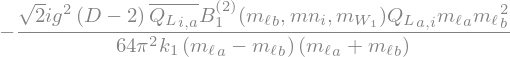

In [58]:
# VF (W1 ni) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - l_a - ladj_a (SFF)
# ---------------------------------

particles_v1 = {external_scalar[0], external_antilepton[0], external_antilepton[1]} # {H10, l[a], ladj[a]}
interaction_dict_v1 = interactionsH10_ll(antilep_index)

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-la-ladj[a]")
    print(f"Vertex 1 (H10-la-ladj[a]) coupling found: {c1}")
    c1L, c1R = get_chiral_couplings(c1)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v1 = VertexSFF(c1R, c1L)
    print(f"Vertex 1 (H10-la-ladj[a]) coupling found:\nL={c1L},\nR={c1R}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: W1p - nadj_i - l_a (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices

particles_v2 = {internal_W1_plus[0], internal_neutrino[1], external_antilepton[0]} # {W1p, nadj[i], l[a]}
interaction_dict_v2 = interactionsWp_n_l(nu_index, antilep_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"W1p-n[{nu_index}]-lbar[{antilep_index}]")

    c2L, c2R = get_chiral_couplings_gamma_mu(c2)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v2 = VertexVFF(c2R, c2L)
    print(f"Vertex 2 (W1p-n[{nu_index}]-lbar[{antilep_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWp_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: W1m - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_W1_minus[0], external_antilepton[1], internal_neutrino[0]} # {W1m, ladj[a], n[i]}
interaction_dict_v3 = interactionsWm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"W1m-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings_gamma_mu(c3)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v3 = VertexVFF(c3R, c3L)
    print(f"Vertex 3 (W1m-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for BubbleVF
# ml[a], ml[b] ,mn[i], mW1
mass_list = [
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_W1_plus[1],        # mW1
]
print("Mass List for BubbleVF:", mass_list)
# Create the BubbleVF diagram object
# Assumes v1 connects external scalar & l[a] & ladj[a]
# Assumes v2 connects W1p, n_i, lbar_a
# Assumes v3 connects W1m, l_a, nbar_i
# Check LFVXD.Hdecay_diagrams_v2.BubbleVF documentation for exact vertex/particle ordering if unsure.
bubble_W1_ni = BubbleVF(
    v1, # Vertex connected to H10, l[a], ladj[a]
    v2, # Vertex connected to W1p, n_i, lbar_a
    v3, # Vertex connected to W1m, l_a, nbar_i
    mass_list
)
bubble_W1_ni.AL().factor()

# VF ($W_2 n_i$)

Vertex 1 (H10-la-ladj[a]) coupling found: sqrt(2)*m_\ell[a]*PL/k_1 + sqrt(2)*m_\ell[a]*PR/k_1
Vertex 1 (H10-la-ladj[a]) coupling found:
L=sqrt(2)*m_\ell[a]/k_1,
R=sqrt(2)*m_\ell[a]/k_1
Vertex 2 (W2p-n[i]-lbar[a]) coupling found:
L=0,
R=g*conjugate(Q_R[i, a])/2
Vertex 3 (W2m-l[a]-nbar[i]) coupling found: L=0, R=g*Q_R[a, i]/2
Mass List for BubbleVF: [m_\ell[a], m_\ell[b], mn[i], m_{W_2}]


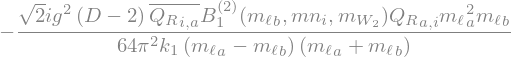

In [59]:
# VF (W2 ni) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - l_a - ladj_a (SFF)
# ---------------------------------

particles_v1 = {external_scalar[0], external_antilepton[0], external_antilepton[1]} # {H10, l[a], ladj[a]}
interaction_dict_v1 = interactionsH10_ll(antilep_index)

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-la-ladj[a]")
    print(f"Vertex 1 (H10-la-ladj[a]) coupling found: {c1}")
    c1L, c1R = get_chiral_couplings(c1)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v1 = VertexSFF(c1R, c1L)
    print(f"Vertex 1 (H10-la-ladj[a]) coupling found:\nL={c1L},\nR={c1R}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: W2p - nadj_i - l_a (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_W2_plus[0], internal_neutrino[1], external_antilepton[0]} # {W2p, nadj[i], l[a]}
interaction_dict_v2 = interactionsWp_n_l(nu_index, antilep_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"W2p-n[{nu_index}]-lbar[{antilep_index}]")

    c2L, c2R = get_chiral_couplings_gamma_mu(c2)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v2 = VertexVFF(c2R, c2L)
    print(f"Vertex 2 (W2p-n[{nu_index}]-lbar[{antilep_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWp_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: W2m - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_W2_minus[0], external_antilepton[1], internal_neutrino[0]} # {W2m, ladj[a], n[i]}
interaction_dict_v3 = interactionsWm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"W2m-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings_gamma_mu(c3)
    # VertexVFF expects (Right Coupling, Left Coupling)
    v3 = VertexVFF(c3R, c3L)
    print(f"Vertex 3 (W2m-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsWm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for BubbleVF
# ml[a], ml[b] ,mn[i], mW2
mass_list = [
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_W2_plus[1],        # mW2
]
print("Mass List for BubbleVF:", mass_list)
# Create the BubbleVF diagram object
# Assumes v1 connects external scalar & l[a] & ladj[a]
# Assumes v2 connects W2p, n_i, lbar_a
# Assumes v3 connects W2m, l_a, nbar_i
# Check LFVXD.Hdecay_diagrams_v2.BubbleVF documentation for exact vertex/particle ordering if unsure.
bubble_W2_ni = BubbleVF(
    v1, # Vertex connected to H10, l[a], ladj[a]
    v2, # Vertex connected to W2p, n_i, lbar_a
    v3, # Vertex connected to W2m, l_a, nbar_i
    mass_list
)
bubble_W2_ni.AL().factor()

# FS ($n_i G_L^\pm$)

Vertex 1 (H10-lb-ladj[b]) coupling found: sqrt(2)*m_\ell[b]*PL/k_1 + sqrt(2)*m_\ell[b]*PR/k_1
Vertex 1 (H10-lb-ladj[b]) coupling found:
L=sqrt(2)*m_\ell[b]/k_1,
R=sqrt(2)*m_\ell[b]/k_1
Vertex 2 (GLp-n[i]-lbar[b]) coupling found:
L=-sqrt(2)*T_{RL}[b, i]/k_1,
R=sqrt(2)*conjugate(Q_L[i, b])*m_\ell[b]/k_1
Vertex 3 (GLm-l[a]-nbar[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
Mass List for BubbleFS: [m_\ell[a], m_\ell[b], mn[i], m_{W_1}]


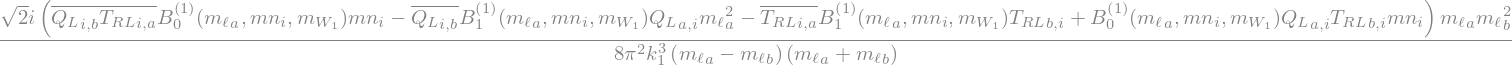

In [ ]:
# FS (ni GL) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - l_b - ladj_b (SFF)
# ---------------------------------

particles_v1 = {external_scalar[0], external_lepton[0], external_lepton[1]} # {H10, l[b], ladj[b]}
interaction_dict_v1 = interactionsH10_ll(lepton_index)

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-lb-ladj[b]")
    print(f"Vertex 1 (H10-lb-ladj[b]) coupling found: {c1}")
    c1L, c1R = get_chiral_couplings(c1)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v1 = VertexSFF(c1R, c1L)
    print(f"Vertex 1 (H10-lb-ladj[b]) coupling found:\nL={c1L},\nR={c1R}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: GLp - nadj_i - l_b (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_GL_plus[0], internal_neutrino[1], external_lepton[0]} # {GLp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"GLp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (GLp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: GLm - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_GL_minus[0], external_antilepton[1], internal_neutrino[0]} # {GLm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"GLm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (GLm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for BubbleFS
# ml[a], ml[b] ,mn[i], mGL
mass_list = [
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_GL_plus[1],        # mW1 (for GLp)
]
print("Mass List for BubbleFS:", mass_list)
# Create the BubbleFS diagram object
# Assumes v1 connects external scalar & l[b] & ladj[b]
# Assumes v2 connects GLp, n_i, lbar_b
# Assumes v3 connects GLm, l_a, nbar_i
# Check LFVXD.Hdecay_diagrams_v2.BubbleFS documentation for exact vertex/particle ordering if unsure.
bubble_ni_GL = BubbleFS(
    v1, # Vertex connected to H10, l[b], ladj[b]
    v2, # Vertex connected to GLp, n_i, lbar_b
    v3, # Vertex connected to GLm, l_a, nbar_i
    mass_list
)
bubble_ni_GL.AL().factor()

# FS ($n_i G_R^\pm$)

Vertex 1 (H10-lb-ladj[b]) coupling found: sqrt(2)*m_\ell[b]*PL/k_1 + sqrt(2)*m_\ell[b]*PR/k_1
Vertex 1 (H10-lb-ladj[b]) coupling found:
L=sqrt(2)*m_\ell[b]/k_1,
R=sqrt(2)*m_\ell[b]/k_1
Vertex 2 (GRp-n[i]-lbar[b]) coupling found:
L=-sqrt(2)*conjugate(Q_R[i, b])*m_\ell[b]/v_R,
R=sqrt(2)*conjugate(J[i, b])/v_R
Vertex 3 (GRm-l[a]-nbar[i]) coupling found: L=sqrt(2)*J[a, i]/v_R, R=-sqrt(2)*Q_R[a, i]*m_\ell[a]/v_R
Mass List for BubbleFS: [m_\ell[a], m_\ell[b], mn[i], m_{W_2}]


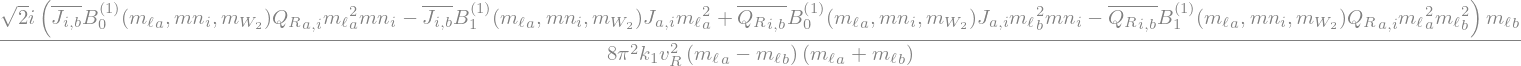

In [ ]:
# FS (ni GR) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - l_b - ladj_b (SFF)
# ---------------------------------

particles_v1 = {external_scalar[0], external_lepton[0], external_lepton[1]} # {H10, l[b], ladj[b]}
interaction_dict_v1 = interactionsH10_ll(lepton_index)

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-lb-ladj[b]")
    print(f"Vertex 1 (H10-lb-ladj[b]) coupling found: {c1}")
    c1L, c1R = get_chiral_couplings(c1)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v1 = VertexSFF(c1R, c1L)
    print(f"Vertex 1 (H10-lb-ladj[b]) coupling found:\nL={c1L},\nR={c1R}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: GRp - nadj_i - l_b (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_GR_plus[0], internal_neutrino[1], external_lepton[0]} # {GRp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"GRp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (GRp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: GRm - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_GR_minus[0], external_antilepton[1], internal_neutrino[0]} # {GRm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"GRm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (GRm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for BubbleFS
# ml[a], ml[b] ,mn[i], mGR
mass_list = [
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_GR_plus[1],        # mW2 (for GRp)
]
print("Mass List for BubbleFS:", mass_list)
# Create the BubbleFS diagram object
# Assumes v1 connects external scalar & l[b] & ladj[b]
# Assumes v2 connects GRp, n_i, lbar_b
# Assumes v3 connects GRm, l_a, nbar_i
# Check LFVXD.Hdecay_diagrams_v2.BubbleFS documentation for exact vertex/particle ordering if unsure.
bubble_ni_GR = BubbleFS(
    v1, # Vertex connected to H10, l[b], ladj[b]
    v2, # Vertex connected to GRp, n_i, lbar_b
    v3, # Vertex connected to GRm, l_a, nbar_i
    mass_list
)
bubble_ni_GR.AL().factor()

# FS ($n_i H_R^\pm$)

Vertex 1 (H10-lb-ladj[b]) coupling found: sqrt(2)*m_\ell[b]*PL/k_1 + sqrt(2)*m_\ell[b]*PR/k_1
Vertex 1 (H10-lb-ladj[b]) coupling found:
L=sqrt(2)*m_\ell[b]/k_1,
R=sqrt(2)*m_\ell[b]/k_1
Vertex 2 (HRp-n[i]-lbar[b]) coupling found:
L=sqrt(2)*conjugate(Q_R[i, b])*m_\ell[b]/k_1,
R=-sqrt(2)*conjugate(K[i, b])/k_1
Vertex 3 (HRm-l[a]-nbar[i]) coupling found: L=-sqrt(2)*K[a, i]/k_1, R=sqrt(2)*Q_R[a, i]*m_\ell[a]/k_1
Mass List for BubbleFS: [m_\ell[a], m_\ell[b], mn[i], m_{H_L^+}]


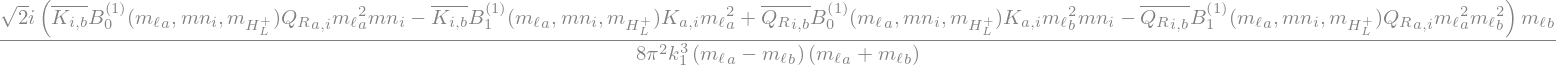

In [ ]:
# FS (ni HR) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - l_b - ladj_b (SFF)
# ---------------------------------

particles_v1 = {external_scalar[0], external_lepton[0], external_lepton[1]} # {H10, l[b], ladj[b]}
interaction_dict_v1 = interactionsH10_ll(lepton_index)

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-lb-ladj[b]")
    print(f"Vertex 1 (H10-lb-ladj[b]) coupling found: {c1}")
    c1L, c1R = get_chiral_couplings(c1)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v1 = VertexSFF(c1R, c1L)
    print(f"Vertex 1 (H10-lb-ladj[b]) coupling found:\nL={c1L},\nR={c1R}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: HRp - nadj_i - l_b (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_HR_plus[0], internal_neutrino[1], external_lepton[0]} # {HRp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"HRp-n[{nu_index}]-lbar[{lepton_index}]")

    c2L, c2R = get_chiral_couplings(c2) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (HRp-n[{nu_index}]-lbar[{lepton_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {lepton_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: HRm - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_HR_minus[0], external_antilepton[1], internal_neutrino[0]} # {HRm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"HRm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (HRm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for BubbleFS
# ml[a], ml[b] ,mn[i], mHR
mass_list = [
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_HR_plus[1],        # mW1 (for HRp)
]
print("Mass List for BubbleFS:", mass_list)
# Create the BubbleFS diagram object
# Assumes v1 connects external scalar & l[b] & ladj[b]
# Assumes v2 connects HRp, n_i, lbar_b
# Assumes v3 connects HRm, l_a, nbar_i
# Check LFVXD.Hdecay_diagrams_v2.BubbleFS documentation for exact vertex/particle ordering if unsure.
bubble_ni_HR = BubbleFS(
    v1, # Vertex connected to H10, l[b], ladj[b]
    v2, # Vertex connected to HRp, n_i, lbar_b
    v3, # Vertex connected to HRm, l_a, nbar_i
    mass_list
)
bubble_ni_HR.AL().factor()

# SF ($G_L^\pm n_i$)

Vertex 1 (H10-la-ladj[a]) coupling found: sqrt(2)*m_\ell[a]*PL/k_1 + sqrt(2)*m_\ell[a]*PR/k_1
Vertex 1 (H10-la-ladj[a]) coupling found:
L=sqrt(2)*m_\ell[a]/k_1,
R=sqrt(2)*m_\ell[a]/k_1
Vertex 2 (GLp-n[i]-lbar[a]) coupling found:
L=-sqrt(2)*T_{RL}[b, i]/k_1,
R=sqrt(2)*conjugate(Q_L[i, b])*m_\ell[b]/k_1
Vertex 3 (GLm-l[a]-nbar[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
Mass List for BubbleSF: [m_\ell[a], m_\ell[b], mn[i], m_{W_1}]


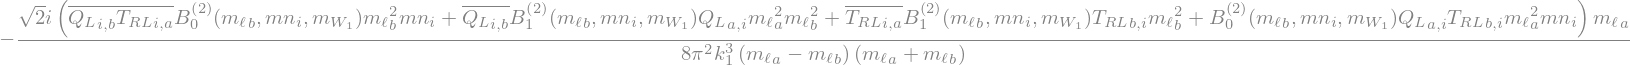

In [ ]:
# SF (GL n_i) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - l_a - ladj_a (SFF)
# ---------------------------------

particles_v1 = {external_scalar[0], external_antilepton[0], external_antilepton[1]} # {H10, l[a], ladj[a]}
interaction_dict_v1 = interactionsH10_ll(antilep_index)

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-la-ladj[a]")
    print(f"Vertex 1 (H10-la-ladj[a]) coupling found: {c1}")
    c1L, c1R = get_chiral_couplings(c1)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v1 = VertexSFF(c1R, c1L)
    print(f"Vertex 1 (H10-la-ladj[a]) coupling found:\nL={c1L},\nR={c1R}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: GLp - n_i - l_a (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_GL_plus[0], internal_neutrino[1], external_lepton[0]} # {GLp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"GLp-n[{nu_index}]-lbar[{antilep_index}]")

    c2L, c2R = get_chiral_couplings(c2) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (GLp-n[{nu_index}]-lbar[{antilep_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: GLm - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_GL_minus[0], external_antilepton[1], internal_neutrino[0]} # {GLm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"GLm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (GLm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for BubbleSF
# ml[a], ml[b] ,mn[i], mGL
mass_list = [
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_GL_plus[1],        # mW1 (for GLp)
]
print("Mass List for BubbleSF:", mass_list)
# Create the BubbleSF diagram object
# Assumes v1 connects external scalar & l[a] & ladj[a]
# Assumes v2 connects GLp, n_i, lbar_a
# Assumes v3 connects GLm, l_a, nbar_i
# Check LFVXD.Hdecay_diagrams_v2.BubbleSF documentation for exact vertex/particle ordering if unsure.
bubble_GL_ni = BubbleSF(
    v1, # Vertex connected to H10, l[a], ladj[a]
    v2, # Vertex connected to GLp, n_i, lbar_a
    v3, # Vertex connected to GLm, l_a, nbar_i
    mass_list
)
bubble_GL_ni.AL().factor()

# SF ($G_R^\pm n_i$)

Vertex 1 (H10-la-ladj[a]) coupling found: sqrt(2)*m_\ell[a]*PL/k_1 + sqrt(2)*m_\ell[a]*PR/k_1
Vertex 1 (H10-la-ladj[a]) coupling found:
L=sqrt(2)*m_\ell[a]/k_1,
R=sqrt(2)*m_\ell[a]/k_1
Vertex 2 (GLp-n[i]-lbar[a]) coupling found:
L=-sqrt(2)*conjugate(Q_R[i, b])*m_\ell[b]/v_R,
R=sqrt(2)*conjugate(J[i, b])/v_R
Vertex 3 (GLm-l[a]-nbar[i]) coupling found: L=sqrt(2)*J[a, i]/v_R, R=-sqrt(2)*Q_R[a, i]*m_\ell[a]/v_R
Mass List for BubbleSF: [m_\ell[a], m_\ell[b], mn[i], m_{W_2}]


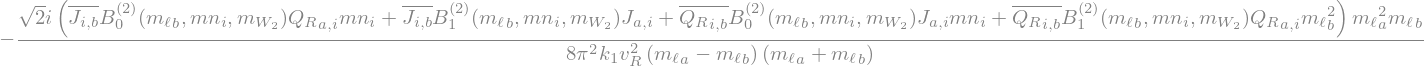

In [ ]:
# SF (GR n_i) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - l_a - ladj_a (SFF)
# ---------------------------------

particles_v1 = {external_scalar[0], external_antilepton[0], external_antilepton[1]} # {H10, l[a], ladj[a]}
interaction_dict_v1 = interactionsH10_ll(antilep_index)

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-la-ladj[a]")
    print(f"Vertex 1 (H10-la-ladj[a]) coupling found: {c1}")
    c1L, c1R = get_chiral_couplings(c1)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v1 = VertexSFF(c1R, c1L)
    print(f"Vertex 1 (H10-la-ladj[a]) coupling found:\nL={c1L},\nR={c1R}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: GRp - n_i - l_a (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_GR_plus[0], internal_neutrino[1], external_lepton[0]} # {GRp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"GRp-n[{nu_index}]-lbar[{antilep_index}]")

    c2L, c2R = get_chiral_couplings(c2) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (GLp-n[{nu_index}]-lbar[{antilep_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: GRm - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_GR_minus[0], external_antilepton[1], internal_neutrino[0]} # {GRm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"GRm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (GLm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for BubbleSF
# ml[a], ml[b] ,mn[i], mGR
mass_list = [
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_GR_plus[1],        # mW2 (for GLp)
]
print("Mass List for BubbleSF:", mass_list)
# Create the BubbleSF diagram object
# Assumes v1 connects external scalar & l[a] & ladj[a]
# Assumes v2 connects GLp, n_i, lbar_a
# Assumes v3 connects GLm, l_a, nbar_i
# Check LFVXD.Hdecay_diagrams_v2.BubbleSF documentation for exact vertex/particle ordering if unsure.
bubble_GR_ni = BubbleSF(
    v1, # Vertex connected to H10, l[a], ladj[a]
    v2, # Vertex connected to GLp, n_i, lbar_a
    v3, # Vertex connected to GLm, l_a, nbar_i
    mass_list
)
bubble_GR_ni.AL().factor()

# SF ($H_R^\pm n_i$)

Vertex 1 (H10-la-ladj[a]) coupling found: sqrt(2)*m_\ell[a]*PL/k_1 + sqrt(2)*m_\ell[a]*PR/k_1
Vertex 1 (H10-la-ladj[a]) coupling found:
L=sqrt(2)*m_\ell[a]/k_1,
R=sqrt(2)*m_\ell[a]/k_1
Vertex 2 (GLp-n[i]-lbar[a]) coupling found:
L=sqrt(2)*conjugate(Q_R[i, b])*m_\ell[b]/k_1,
R=-sqrt(2)*conjugate(K[i, b])/k_1
Vertex 3 (GLm-l[a]-nbar[i]) coupling found: L=-sqrt(2)*K[a, i]/k_1, R=sqrt(2)*Q_R[a, i]*m_\ell[a]/k_1
Mass List for BubbleSF: [m_\ell[a], m_\ell[b], mn[i], m_{W_2}]


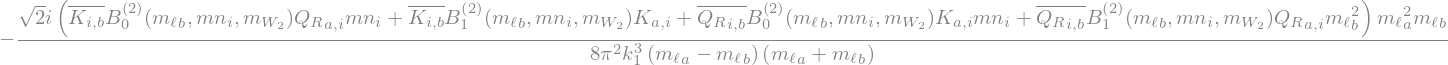

In [ ]:
# SF (HR n_i) loop: (particle, Mass Symbol)}
# --- Vertex Construction ---
# Vertex 1: H10 - l_a - ladj_a (SFF)
# ---------------------------------

particles_v1 = {external_scalar[0], external_antilepton[0], external_antilepton[1]} # {H10, l[a], ladj[a]}
interaction_dict_v1 = interactionsH10_ll(antilep_index)

try:
    c1 = find_interaction_coefficient(particles_v1, interaction_dict_v1, "H10-la-ladj[a]")
    print(f"Vertex 1 (H10-la-ladj[a]) coupling found: {c1}")
    c1L, c1R = get_chiral_couplings(c1)
    # VertexSFF expects (Right Coupling, Left Coupling)
    v1 = VertexSFF(c1R, c1L)
    print(f"Vertex 1 (H10-la-ladj[a]) coupling found:\nL={c1L},\nR={c1R}")
except ValueError as e:
    # Handle error appropriately, maybe exit or use a default value if applicable
    raise ValueError(f"Vertex 1 interaction not found: {e}")

# Vertex 2: HRp - n_i - l_a (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v2 = {internal_HR_plus[0], internal_neutrino[1], external_lepton[0]} # {HRp, nadj[i], l[b]}
interaction_dict_v2 = interactionsSp_n_l(nu_index, lepton_index) # Pass indices

try:
    # Assuming the interaction dict keys *are* the vertex particles:
    # We need the key tuple that matches our particles to get the coefficient
    c2 = None
    for interaction_key, coeff in interaction_dict_v2.items():
        # Use set equality for exact match of particles at the vertex
        if set(interaction_key) == particles_v2:
            c2 = coeff
            break
    if c2 is None:
        raise ValueError("No interaction match for vertex2") # More specific error

    # Original logic check (less strict, might find interactions with extra particles):
    # c2 = find_interaction_coefficient(particles_v2, interaction_dict_v2, f"HRp-n[{nu_index}]-lbar[{antilep_index}]")

    c2L, c2R = get_chiral_couplings(c2) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v2 = VertexSFF(c2R, c2L)
    print(f"Vertex 2 (GLp-n[{nu_index}]-lbar[{antilep_index}]) coupling found:\nL={c2L},\nR={c2R}")
except ValueError as e:
    print(f"Error finding Vertex 2 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSp_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v2)
    raise ValueError(f"Vertex 2 interaction not found: {e}")

# Vertex 3: GRm - ladj_a - n_i (VFF)
# ---------------------------------
# Note: The interaction function needs the specific indices
particles_v3 = {internal_HR_minus[0], external_antilepton[1], internal_neutrino[0]} # {HRm, ladj[a], n[i]}
interaction_dict_v3 = interactionsSm_n_l(nu_index, antilep_index) # Pass indices

try:
    # Similar to v2, find the exact interaction term
    c3 = None
    for interaction_key, coeff in interaction_dict_v3.items():
        if set(interaction_key) == particles_v3:
            c3 = coeff
            break
    if c3 is None:
        raise ValueError("No interaction match for vertex3") # More specific error

    # Original logic check:
    # c3 = find_interaction_coefficient(particles_v3, interaction_dict_v3, f"HRm-l[{antilep_index}]-nbar[{nu_index}]")

    c3L, c3R = get_chiral_couplings(c3) 
    # VertexSFF expects (Right Coupling, Left Coupling)
    v3 = VertexSFF(c3R, c3L)
    print(f"Vertex 3 (GLm-l[{antilep_index}]-nbar[{nu_index}]) coupling found: L={c3L}, R={c3R}")
except ValueError as e:
    print(f"Error finding Vertex 3 interaction: {e}")
    print(f"Interaction Dict Searched (interactionsSm_n_l({nu_index}, {antilep_index})):")
    print(interaction_dict_v3)
    raise ValueError(f"Vertex 3 interaction not found: {e}")

# --- Diagram Instantiation ---
# Assemble the list of mass symbols in the correct order for BubbleSF
# ml[a], ml[b] ,mn[i], mGR
mass_list = [
    external_antilepton[2],     # ml[a]
    external_lepton[2],         # ml[b]
    internal_neutrino[2],       # mn[i]
    internal_GR_plus[1],        # mW2 (for GLp)
]
print("Mass List for BubbleSF:", mass_list)
# Create the BubbleSF diagram object
# Assumes v1 connects external scalar & l[a] & ladj[a]
# Assumes v2 connects GLp, n_i, lbar_a
# Assumes v3 connects GLm, l_a, nbar_i
# Check LFVXD.Hdecay_diagrams_v2.BubbleSF documentation for exact vertex/particle ordering if unsure.
bubble_HR_ni = BubbleSF(
    v1, # Vertex connected to H10, l[a], ladj[a]
    v2, # Vertex connected to GLp, n_i, lbar_a
    v3, # Vertex connected to GLm, l_a, nbar_i
    mass_list
)
bubble_HR_ni.AL().factor()